In [1]:
import pandas as pd
from jours import to_cet

x_train=pd.read_csv('training_input_qFI2jug.csv', index_col="Horodate_UTC")
x_train.index = pd.DatetimeIndex(x_train.index)

x_train.head()

# df = x_train
# 
# df = to_cet(df)
# 
# df.head()




,IDS,Horodate,Mois,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),...,Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°Celcius),Température normale lissée (°Celcius),Production éolienne totale (W),Production photovoltaïque totale (W),Pseudo rayonnement,Consommation HTA totale (W),Soutirage net vers autres GRD (W)
Horodate_UTC,,,,,,,,,,,,,,,,,,,,,
2013-10-13 22:00:00,1,2013-10-13T00:00:00+02:00,10,39784230000,103415000,2849582877,37576289504,8062590100,29513699404,1009515939,...,11876221,0.0,608873.0,9.6,13.5,302936853.0,19660.0,NaN,9072106039,436423300
2013-10-13 22:30:00,2,2013-10-13T00:30:00+02:00,10,37114681000,119543000,2603906116,35230706411,8023402840,27207303571,1007708541,...,11719006,0.0,608873.0,9.6,13.5,368725682.0,17004.0,NaN,9031111381,407924660
2013-10-13 23:00:00,3,2013-10-13T01:00:00+02:00,10,36148675000,136447000,2516689035,34428316838,7982839990,26445476848,966660739,...,11742773,0.0,608873.0,9.6,13.5,448572685.0,24299.0,NaN,8949500729,398239990
2013-10-13 23:30:00,4,2013-10-13T01:30:00+02:00,10,35488831000,164083000,2457628530,33922151279,7953531370,25968619909,929311479,...,11719010,0.0,608873.0,9.5,13.5,550243295.0,23308.0,NaN,8882842849,380571680
2013-10-14 00:00:00,5,2013-10-13T02:00:00+02:00,10,34882911000,191859000,2403762298,33447730318,7922448360,25525281958,907509517,...,11731807,0.0,608873.0,9.5,13.5,644783673.0,21963.0,NaN,8829957877,367153030


I think, We need to use the pseudo radiation column in the time series analysis.
And we can drop this column when we will train the model.


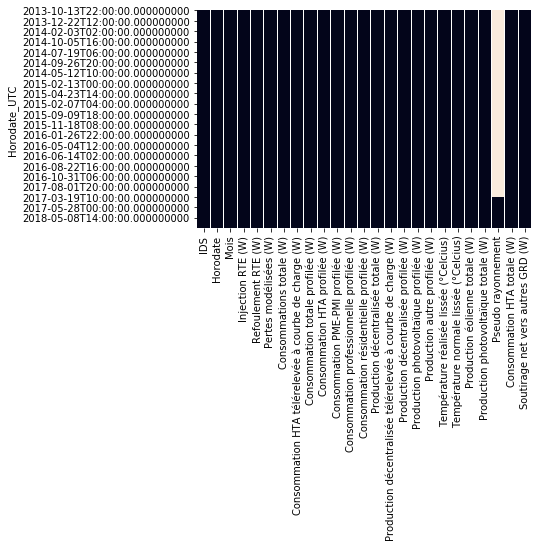

In [3]:
# Define helper function
# def fill_missing(grp):
#     res = grp.set_index('date')\
#     .interpolate(method='linear',limit=5)\
#     .ffill()\
#     .bfill()
#     del res['Pseudo rayonnement']
#     return res# Group by country name and fill missing
# 
# df = x_train
# 
# df['dt_Horodate_UTC'] = pd.to_datetime(df['Horodate_UTC'], infer_datetime_format=True)
# 
# df['date'] = df['dt_Horodate_UTC'].map(lambda x: x.strftime('%d/%m %H:%S'))
# 
# df = df.groupby(['Pseudo rayonnement']).apply(
#     lambda grp: fill_missing(grp)
# )
# 
# df = df.reset_index()

df = x_train

import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

sb.heatmap(df.isnull(), cbar=False)
plt.show()


In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import Imputer
# from sklearn.pipeline import Pipeline
# imp=Imputer(missing_values="NaN", strategy="mean", axis=0)
# linmodel = LinearRegression()
# steps=[('imputation',imp),('linear_regression',linmodel)]
# pipeline=Pipeline(steps)
# X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.3, random_state=42)
# pipeline.fit(X_train, Y_train)
# y_pred=pipeline.predict(X_test)
# pipeline.score(X_test, Y_test)

liste_dates = df.index.tolist()
for dt in liste_dates :
    df.at[dt, 'day'] = dt.strftime('%d/%m %H:%M')
    

df_month = df.sort_values(by='day', ascending=True)
df_month.head(20)
df_month = df_month.interpolate(str="linear", axis=0).ffill().bfill()
df_month = df_month.sort_values(by='IDS', ascending=True)

if 'day' in x_train.columns:
    x_train.drop('day', axis=1, inplace=True)

x_train['Pseudo rayonnement'] = df_month['Pseudo rayonnement']

x_train.head(20)

In [3]:
from jours import holydays, summer_winter_time

changeover = summer_winter_time(x_train)

changeover.split()

In [4]:
summer_time = changeover.summer_time()
summer_time.head()


,IDS,Horodate,Mois,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),...,Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°Celcius),Température normale lissée (°Celcius),Production éolienne totale (W),Production photovoltaïque totale (W),Pseudo rayonnement,Consommation HTA totale (W),Soutirage net vers autres GRD (W)
Horodate_UTC,,,,,,,,,,,,,,,,,,,,,
2013-10-13 22:00:00,1,2013-10-13T00:00:00+02:00,10,39784230000,103415000,2849582877,37576289504,8062590100,29513699404,1009515939,...,11876221,0.0,608873.0,9.6,13.5,302936853.0,19660.0,69.159021,9072106039,436423300
2013-10-13 22:30:00,2,2013-10-13T00:30:00+02:00,10,37114681000,119543000,2603906116,35230706411,8023402840,27207303571,1007708541,...,11719006,0.0,608873.0,9.6,13.5,368725682.0,17004.0,69.212029,9031111381,407924660
2013-10-13 23:00:00,3,2013-10-13T01:00:00+02:00,10,36148675000,136447000,2516689035,34428316838,7982839990,26445476848,966660739,...,11742773,0.0,608873.0,9.6,13.5,448572685.0,24299.0,69.318043,8949500729,398239990
2013-10-13 23:30:00,4,2013-10-13T01:30:00+02:00,10,35488831000,164083000,2457628530,33922151279,7953531370,25968619909,929311479,...,11719010,0.0,608873.0,9.5,13.5,550243295.0,23308.0,69.450561,8882842849,380571680
2013-10-14 00:00:00,5,2013-10-13T02:00:00+02:00,10,34882911000,191859000,2403762298,33447730318,7922448360,25525281958,907509517,...,11731807,0.0,608873.0,9.5,13.5,644783673.0,21963.0,50.124460,8829957877,367153030


In [5]:
winter_time = changeover.winter_time()
winter_time.head()

,IDS,Horodate,Mois,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),...,Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°Celcius),Température normale lissée (°Celcius),Production éolienne totale (W),Production photovoltaïque totale (W),Pseudo rayonnement,Consommation HTA totale (W),Soutirage net vers autres GRD (W)
Horodate_UTC,,,,,,,,,,,,,,,,,,,,,
2013-10-27 01:00:00,631,2013-10-26T03:00:00+02:00,10,26579816000,1088733000,1701083472,26688593449,9103064980,17585528469,1271190114,...,14498851,0.0,608525.0,16.6,11.7,2.203727e+09,27245.0,98.796891,10374255094,256122920
2013-10-27 01:30:00,632,2013-10-26T03:30:00+02:00,10,25535989000,1137586000,1617423634,25699406124,9030682810,16668723314,1294578806,...,14514098,0.0,608525.0,16.6,11.6,2.214471e+09,21304.0,98.753368,10325261616,243923010
2013-10-27 02:00:00,633,2013-10-26T04:00:00+02:00,10,24942869000,1264177000,1570352206,25143977441,8983216110,16160761331,1293044596,...,14458187,0.0,608525.0,16.6,11.6,2.327500e+09,23276.0,98.709845,10276260706,238223310
2013-10-27 02:30:00,634,2013-10-26T04:30:00+02:00,10,24595514000,1277985000,1542941902,24840184122,8957626550,15882557572,1303188743,...,14288755,0.0,608525.0,16.6,11.6,2.354809e+09,24258.0,98.608290,10260815293,237159690
2013-10-27 03:00:00,635,2013-10-26T05:00:00+02:00,10,24804831000,1270872000,1559445568,25036284061,9093525060,15942759001,1301506186,...,14891928,0.0,608525.0,16.6,11.6,2.353057e+09,26255.0,98.564767,10395031246,241846040


In [6]:
date = holydays()

# date.set_extradaysoff(True)

date.Dataframe(summer_time)

# date.split()

In [7]:
summer_time_workday_df = date.business_days()
summer_time_workday_df.head(20)

,IDS,Horodate,Mois,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),...,Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°Celcius),Température normale lissée (°Celcius),Production éolienne totale (W),Production photovoltaïque totale (W),Pseudo rayonnement,Consommation HTA totale (W),Soutirage net vers autres GRD (W)
Horodate_UTC,,,,,,,,,,,,,,,,,,,,,
2013-10-14 00:00:00,5,2013-10-13T02:00:00+02:00,10,34882911000,191859000,2403762298,33447730318,7922448360,25525281958,907509517,...,11731807,0.0,608873.0,9.5,13.5,6.447837e+08,2.196300e+04,50.124460,8829957877,367153030
2013-10-14 00:30:00,6,2013-10-13T02:30:00+02:00,10,32989918000,218749000,2237743365,31811786665,7890473020,23921313645,911513262,...,11719010,0.0,608873.0,9.5,13.4,7.440487e+08,2.360000e+04,50.342264,8801986282,345164660
2013-10-14 01:00:00,7,2013-10-13T03:00:00+02:00,10,31555221000,286655000,2114206795,30572424807,7878131750,22694293057,897252387,...,11755572,0.0,608873.0,9.4,13.4,8.640563e+08,2.063700e+04,50.466724,8775384137,326120710
2013-10-14 01:30:00,8,2013-10-13T03:30:00+02:00,10,30358247000,332130000,2012649959,29543363726,7869134200,21674229526,899179610,...,11803104,0.0,608873.0,9.4,13.4,9.622568e+08,1.962200e+04,50.528954,8768313810,313636680
2013-10-14 02:00:00,9,2013-10-13T04:00:00+02:00,10,29634878000,373161000,1951941973,28919999723,7857298140,21062701583,903294176,...,12031617,0.0,608873.0,9.4,13.4,1.032753e+09,1.764000e+04,50.653414,8760592316,303554290
2013-10-14 02:30:00,10,2013-10-13T04:30:00+02:00,10,29220206000,448540000,1917367316,28574876855,7863666930,20711209925,909053910,...,12499612,0.0,608873.0,9.3,13.3,1.138875e+09,2.324700e+04,50.808989,8772720840,295688680
2013-10-14 03:00:00,11,2013-10-13T05:00:00+02:00,10,29279904000,503287000,1922334676,28668367602,7900744470,20767623132,910809517,...,12801248,0.0,608873.0,9.2,13.3,1.229786e+09,2.159000e+04,50.902334,8811553987,293650270
2013-10-14 03:30:00,12,2013-10-13T05:30:00+02:00,10,29339176000,551695000,1927269969,28772583440,7925256630,20847326810,924292549,...,12751889,0.0,608873.0,9.2,13.3,1.334063e+09,1.894200e+04,50.995678,8849549179,298448980
2013-10-14 04:00:00,13,2013-10-13T06:00:00+02:00,10,29923167000,635255000,1976076190,29377866297,7837626840,21540239457,925394967,...,12704357,0.0,608873.0,9.1,13.2,1.493083e+09,2.489300e+04,51.151253,8763021807,303413310


In [8]:
summer_time_dayoff_df = date.public_holiday()
summer_time_dayoff_df.head(20)


,IDS,Horodate,Mois,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),...,Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°Celcius),Température normale lissée (°Celcius),Production éolienne totale (W),Production photovoltaïque totale (W),Pseudo rayonnement,Consommation HTA totale (W),Soutirage net vers autres GRD (W)
Horodate_UTC,,,,,,,,,,,,,,,,,,,,,
2013-10-13 22:00:00,1,2013-10-13T00:00:00+02:00,10,39784230000,103415000,2849582877,37576289504,8062590100,29513699404,1009515939,...,11876221,0.0,608873.0,9.6,13.5,3.029369e+08,19660.0,69.159021,9072106039,436423300
2013-10-13 22:30:00,2,2013-10-13T00:30:00+02:00,10,37114681000,119543000,2603906116,35230706411,8023402840,27207303571,1007708541,...,11719006,0.0,608873.0,9.6,13.5,3.687257e+08,17004.0,69.212029,9031111381,407924660
2013-10-13 23:00:00,3,2013-10-13T01:00:00+02:00,10,36148675000,136447000,2516689035,34428316838,7982839990,26445476848,966660739,...,11742773,0.0,608873.0,9.6,13.5,4.485727e+08,24299.0,69.318043,8949500729,398239990
2013-10-13 23:30:00,4,2013-10-13T01:30:00+02:00,10,35488831000,164083000,2457628530,33922151279,7953531370,25968619909,929311479,...,11719010,0.0,608873.0,9.5,13.5,5.502433e+08,23308.0,69.450561,8882842849,380571680
2013-10-19 00:00:00,245,2013-10-18T02:00:00+02:00,10,33686594000,129950000,1984788270,32630381752,10483178880,22147202872,1519171839,...,13397012,0.0,607987.0,13.7,12.8,4.875831e+08,15321.0,77.120898,12002350719,338892980
2013-10-19 00:30:00,246,2013-10-18T02:30:00+02:00,10,32214243000,124132000,1878874997,31243739701,10476594310,20767145391,1550189766,...,13170198,0.0,607987.0,13.6,12.8,4.525614e+08,18984.0,77.138169,12026784076,323785680
2013-10-19 01:00:00,247,2013-10-18T03:00:00+02:00,10,31128258000,123587000,1802899886,30215676491,10484512810,19731163681,1543913050,...,13104347,0.0,607987.0,13.6,12.8,4.241059e+08,17968.0,77.259067,12028425860,313428590
2013-10-19 01:30:00,248,2013-10-18T03:30:00+02:00,10,30325643000,135027000,1747919526,29454789181,10537887190,18916901991,1568030620,...,12917777,0.0,607987.0,13.6,12.7,4.160944e+08,17646.0,77.310881,12105917810,306179710
2013-10-19 02:00:00,249,2013-10-18T04:00:00+02:00,10,30077875000,135111000,1731147965,29224557519,10665305180,18559252339,1631709244,...,13051304,0.0,607987.0,13.6,12.7,4.158901e+08,17977.0,77.379965,12297014424,304384000


In [9]:
date.Dataframe(winter_time)
# date.split()

In [10]:
winter_time_workday_df = date.business_days()
winter_time_workday_df.head(20)

,IDS,Horodate,Mois,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),...,Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°Celcius),Température normale lissée (°Celcius),Production éolienne totale (W),Production photovoltaïque totale (W),Pseudo rayonnement,Consommation HTA totale (W),Soutirage net vers autres GRD (W)
Horodate_UTC,,,,,,,,,,,,,,,,,,,,,
2013-10-28 00:00:00,677,2013-10-27T02:00:00+02:00,10,27636050000,2979415000,1786801176,28410338577,7672294210,20738044367,1002719570,...,13672053,0.0,608525.0,16.8,11.5,4.864283e+09,2.419600e+04,99.931790,8675013780,254352340
2013-10-28 00:30:00,678,2013-10-27T02:30:00+02:00,10,25934301000,3086172000,1649223963,26738126243,7638290070,19099836173,1025911459,...,13602586,0.0,608525.0,16.8,11.5,4.856372e+09,2.310300e+04,99.812424,8664201529,233268670
2013-10-28 01:00:00,679,2013-10-27T02:00:00+01:00,10,24459666000,3201714000,1532253405,25313829338,7606637680,17707191658,856172708,...,13672053,0.0,608525.0,16.8,11.5,4.868304e+09,2.300200e+04,99.744214,8462810388,216480690
2013-10-28 01:30:00,680,2013-10-27T02:30:00+01:00,10,23375802000,3293724000,1447608994,24251375532,7579418810,16671956722,895502521,...,13602586,0.0,608525.0,16.8,11.5,4.896575e+09,2.190700e+04,99.676005,8474921331,205722940
2013-10-28 02:00:00,681,2013-10-27T03:00:00+01:00,10,22856999000,3441096000,1407491691,23721592891,7566431260,16155161631,931770173,...,13616142,0.0,608525.0,16.8,11.5,4.986335e+09,2.192700e+04,99.641900,8498201433,200179680
2013-10-28 02:30:00,682,2013-10-27T03:30:00+01:00,10,22481941000,3484826000,1378650442,23371139708,7546684550,15824455158,979268804,...,13658500,0.0,608525.0,16.8,11.5,5.022224e+09,2.159600e+04,99.590743,8525953354,196666010
2013-10-28 03:00:00,683,2013-10-27T04:00:00+01:00,10,22292748000,3501652000,1364153040,23180781322,7539947600,15640833722,1023235452,...,13938063,0.0,608525.0,16.7,11.4,5.022595e+09,2.159500e+04,99.522533,8563183052,195489990
2013-10-28 03:30:00,684,2013-10-27T04:30:00+01:00,10,22206676000,3562903000,1357568910,23092682566,7545066880,15547615686,1036813036,...,14442966,0.0,608525.0,16.7,11.4,5.082169e+09,2.258300e+04,99.454324,8581879916,195604310
2013-10-28 04:00:00,685,2013-10-27T05:00:00+01:00,10,22472300000,3587648000,1377910845,23354422246,7563289000,15791133246,1047631558,...,14724222,0.0,608525.0,16.7,11.4,5.127443e+09,2.489800e+04,99.352010,8610920558,198840350


In [11]:
winter_time_dayoff_df = date.public_holiday()
winter_time_dayoff_df.head(20)

,IDS,Horodate,Mois,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),...,Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°Celcius),Température normale lissée (°Celcius),Production éolienne totale (W),Production photovoltaïque totale (W),Pseudo rayonnement,Consommation HTA totale (W),Soutirage net vers autres GRD (W)
Horodate_UTC,,,,,,,,,,,,,,,,,,,,,
2013-10-27 01:00:00,631,2013-10-26T03:00:00+02:00,10,26579816000,1088733000,1701083472,26688593449,9103064980,17585528469,1271190114,...,14498851,0.0,608525.0,16.6,11.7,2.203727e+09,2.724500e+04,98.796891,10374255094,256122920
2013-10-27 01:30:00,632,2013-10-26T03:30:00+02:00,10,25535989000,1137586000,1617423634,25699406124,9030682810,16668723314,1294578806,...,14514098,0.0,608525.0,16.6,11.6,2.214471e+09,2.130400e+04,98.753368,10325261616,243923010
2013-10-27 02:00:00,633,2013-10-26T04:00:00+02:00,10,24942869000,1264177000,1570352206,25143977441,8983216110,16160761331,1293044596,...,14458187,0.0,608525.0,16.6,11.6,2.327500e+09,2.327600e+04,98.709845,10276260706,238223310
2013-10-27 02:30:00,634,2013-10-26T04:30:00+02:00,10,24595514000,1277985000,1542941902,24840184122,8957626550,15882557572,1303188743,...,14288755,0.0,608525.0,16.6,11.6,2.354809e+09,2.425800e+04,98.608290,10260815293,237159690
2013-10-27 03:00:00,635,2013-10-26T05:00:00+02:00,10,24804831000,1270872000,1559445568,25036284061,9093525060,15942759001,1301506186,...,14891928,0.0,608525.0,16.6,11.6,2.353057e+09,2.625500e+04,98.564767,10395031246,241846040
2013-10-27 03:30:00,636,2013-10-26T05:30:00+02:00,10,25107424000,1314574000,1583377874,25337285225,9224211760,16113073465,1290529437,...,14876680,0.0,608525.0,16.6,11.5,2.424454e+09,2.360700e+04,98.492228,10514741197,243774350
2013-10-27 04:00:00,637,2013-10-26T06:00:00+02:00,10,25918641000,1394116000,1647970831,26124276510,9321731350,16802545160,1167448161,...,14849571,0.0,608525.0,16.6,11.5,2.550484e+09,2.426100e+04,98.448705,10489179511,247092950
2013-10-27 04:30:00,638,2013-10-26T06:30:00+02:00,10,26535356000,1455770000,1697498824,26756960381,9437366570,17319593811,1154647926,...,14891925,0.0,608525.0,16.5,11.5,2.685217e+09,2.493900e+04,98.405181,10592014496,254741720
2013-10-27 05:00:00,639,2013-10-26T07:00:00+02:00,10,27656011000,1506009000,1788431392,27883433101,9565822590,18317610511,1200423103,...,14836013,0.0,608525.0,16.5,11.4,2.842557e+09,1.398130e+05,98.318135,10766245693,263340680
